In [1]:
import pandas as pd
import os
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.impute import KNNImputer
file_dir = r'C:\Users\zhxum\OneDrive - University of Rochester\UR\Fall 2022\DSCC 383\Capstone_MacroX\Processed_Gases_Official_Data'

In [2]:
coor = pd.read_csv(r'C:\Users\zhxum\OneDrive - University of Rochester\UR\Fall 2022\DSCC 383\Capstone_MacroX\station_coordinates.csv',index_col=0)
coor['file_name'] = os.listdir(file_dir)
coor['city'] = [name.split('_')[1] for name in os.listdir(file_dir)]
coor.head()

,Station,Longitude,Latitude,file_name,city
0,"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayaw...",80.631355,16.506194,"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayaw...",Vijayawada
1,"Andhra Pradesh_Visakhapatnam_GVM Corporation, ...",83.218481,17.686816,"Andhra Pradesh_Visakhapatnam_GVM Corporation, ...",Visakhapatnam
2,"Bihar_Aurangabad_Gurdeo Nagar, Aurangabad - BSPCB",84.368005,24.754865,"Bihar_Aurangabad_Gurdeo Nagar, Aurangabad - BS...",Aurangabad
3,"Bihar_Patna_DRM Office Danapur, Patna - BSPCB",85.044299,25.585624,"Bihar_Patna_DRM Office Danapur, Patna - BSPCB.csv",Patna
4,"Bihar_Patna_Govt. High School Shikarpur, Patna...",85.227233,25.593270,"Bihar_Patna_Govt. High School Shikarpur, Patna...",Patna


In [8]:
coor['coords'] = [[coor.Longitude[i], coor.Latitude[i]] for i in range(len(coor))]
coordinates_array = np.array(list(coor.coords))
dist_array = pdist(coordinates_array)
dist_matrix = squareform(dist_array)
dist_matrix = pd.DataFrame(dist_matrix, columns=coor.file_name, index=coor.file_name)

In [9]:
dist_matrix

file_name,"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv","Andhra Pradesh_Visakhapatnam_GVM Corporation, Visakhapatnam - APPCB.csv","Bihar_Aurangabad_Gurdeo Nagar, Aurangabad - BSPCB.csv","Bihar_Patna_DRM Office Danapur, Patna - BSPCB.csv","Bihar_Patna_Govt. High School Shikarpur, Patna - BSPCB.csv","Bihar_Patna_IGSC Planetarium Complex, Patna - BSPCB.csv","Bihar_Patna_Rajbansi Nagar, Patna - BSPCB.csv","Bihar_Patna_Samanpura, Patna - BSPCB.csv","Chandigarh_Chandigarh_Sector 22, Chandigarh - CPCC.csv","Chandigarh_Chandigarh_Sector-25, Chandigarh - CPCC.csv",...,"Uttar Pradesh_Varanasi_IESD Banaras Hindu University, Varanasi - UPPCB.csv","Uttar Pradesh_Varanasi_Maldahiya, Varanasi - UPPCB.csv","Uttarakhand_Dehradun_Doon University, Dehradun - UKPCB.csv","West Bengal_Asansol_Asansol Court Area, Asansol - WBPCB.csv","West Bengal_Kolkata_Ballygunge, Kolkata - WBPCB.csv","West Bengal_Kolkata_Bidhannagar, Kolkata - WBPCB.csv","West Bengal_Kolkata_Fort William, Kolkata - WBPCB.csv","West Bengal_Kolkata_Jadavpur, Kolkata - WBPCB.csv","West Bengal_Kolkata_Rabindra Bharati University, Kolkata - WBPCB.csv","West Bengal_Kolkata_Victoria, Kolkata - WBPCB.csv"
file_name,,,,,,,,,,,,,,,,,,,,,
"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv",0.000000,2.843781,9.055558,10.095054,10.183175,10.143760,10.140945,10.132332,14.739891,14.762150,...,9.069566,9.130592,14.003867,9.562598,9.802340,9.872269,9.795254,9.786334,9.831972,9.794259
"Andhra Pradesh_Visakhapatnam_GVM Corporation, Visakhapatnam - APPCB.csv",2.843781,0.000000,7.160916,8.107082,8.157641,8.136826,8.140075,8.137499,14.550835,14.574359,...,7.578772,7.641942,13.604567,7.063993,7.066357,7.137003,7.062999,7.047755,7.100404,7.060896
"Bihar_Aurangabad_Gurdeo Nagar, Aurangabad - BSPCB.csv",9.055558,7.160916,0.000000,1.071230,1.200498,1.138652,1.128646,1.113724,9.665210,9.688288,...,1.463601,1.486701,8.390205,2.790460,4.576243,4.593910,4.537220,4.596510,4.543323,4.547683
"Bihar_Patna_DRM Office Danapur, Patna - BSPCB.csv",10.095054,8.107082,1.071230,0.000000,0.183094,0.093649,0.070020,0.045808,9.741973,9.764225,...,2.074467,2.065569,8.422270,2.687192,4.514636,4.515823,4.474636,4.540391,4.471779,4.486097
"Bihar_Patna_Govt. High School Shikarpur, Patna - BSPCB.csv",10.183175,8.157641,1.200498,0.183094,0.000000,0.089672,0.115723,0.143370,9.893796,9.915955,...,2.256454,2.248062,8.570742,2.566659,4.387134,4.386248,4.347171,4.413483,4.343195,4.358712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"West Bengal_Kolkata_Bidhannagar, Kolkata - WBPCB.csv",9.872269,7.137003,4.593910,4.515823,4.386248,4.452386,4.477671,4.500514,14.212303,14.234996,...,6.046765,6.075073,12.909829,1.839056,0.070785,0.000000,0.082132,0.094719,0.055135,0.079781
"West Bengal_Kolkata_Fort William, Kolkata - WBPCB.csv",9.795254,7.062999,4.537220,4.474636,4.347171,4.412310,4.437424,4.460015,14.162708,14.185435,...,5.988012,6.016859,12.862046,1.792907,0.040004,0.082132,0.000000,0.068673,0.037806,0.011816
"West Bengal_Kolkata_Jadavpur, Kolkata - WBPCB.csv",9.786334,7.047755,4.596510,4.540391,4.413483,4.478366,4.503435,4.525958,14.225343,14.248086,...,6.045950,6.075138,12.925438,1.857445,0.032917,0.094719,0.068673,0.000000,0.089698,0.056875


In [ ]:
dist_matrix.to_csv('dist_matrix.csv',index=True)

In [27]:
temp = dist_matrix['Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv'].reset_index()
temp.sort_values(by='Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv',inplace=True)
temp.reset_index(drop=True, inplace=True)
temp

,file_name,"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv"
0,"Andhra Pradesh_Vijayawada_PWD Grounds, Vijayaw...",0.000000
1,"Telangana_Hyderabad_ECIL Kapra, Hyderabad - TS...",2.264963
2,"Telangana_Hyderabad_Central University, Hydera...",2.493272
3,"Telangana_Hyderabad_Bollaram Industrial Area, ...",2.504733
4,"Telangana_Hyderabad_ICRISAT Patancheru, Hydera...",2.561494
...,...,...
178,"Punjab_Jalandhar_Civil Line, Jalandhar - PPCB.csv",15.652330
179,"Manipur_Imphal_DM College of Science, Imphal -...",15.695382
180,"Punjab_Amritsar_Golden Temple, Amritsar - PPCB...",16.172355
181,"Nagaland_Kohima_PWD Juction, Kohima - NPCB.csv",16.287483


In [11]:
city_dic = {}
for name in os.listdir(file_dir):
    city = name.split('_')[1]
    if city in city_dic:
        city_dic[city].append(name)
    else:
        city_dic[city] = [name]

city_dic

{'Vijayawada': ['Andhra Pradesh_Vijayawada_PWD Grounds, Vijayawada - APPCB.csv'],
 'Visakhapatnam': ['Andhra Pradesh_Visakhapatnam_GVM Corporation, Visakhapatnam - APPCB.csv'],
 'Aurangabad': ['Bihar_Aurangabad_Gurdeo Nagar, Aurangabad - BSPCB.csv',
  'Maharashtra_Aurangabad_More Chowk Waluj, Aurangabad - MPCB.csv'],
 'Patna': ['Bihar_Patna_DRM Office Danapur, Patna - BSPCB.csv',
  'Bihar_Patna_Govt. High School Shikarpur, Patna - BSPCB.csv',
  'Bihar_Patna_IGSC Planetarium Complex, Patna - BSPCB.csv',
  'Bihar_Patna_Rajbansi Nagar, Patna - BSPCB.csv',
  'Bihar_Patna_Samanpura, Patna - BSPCB.csv'],
 'Chandigarh': ['Chandigarh_Chandigarh_Sector 22, Chandigarh - CPCC.csv',
  'Chandigarh_Chandigarh_Sector-25, Chandigarh - CPCC.csv',
  'Chandigarh_Chandigarh_Sector-53, Chandigarh - CPCC.csv'],
 'Bhilai': ['Chhattisgarh_Bhilai_Civic Center, Bhilai - Bhilai Steel Plant.csv'],
 'Delhi': ['Delhi_Delhi_Alipur, Delhi - DPCC.csv',
  'Delhi_Delhi_Anand Vihar, Delhi - DPCC.csv',
  'Delhi_Delhi_Asho

In [2]:
low_na = []
high_na = []
na_rate_list = []
for name in os.listdir(file_dir):
    df = pd.read_csv(file_dir+'\\'+name,index_col=0)
    na_rate = df.isna().sum().values.sum()/(4*len(df))
    na_rate_list.append(na_rate)
    if na_rate < 0.3:
        low_na.append(name)
    else:
        high_na.append(name)

In [3]:
na_sort = pd.DataFrame({'file_name': os.listdir(file_dir), 'na_rate': na_rate_list})
na_sort.sort_values(by='na_rate',inplace=True)
na_sort.reset_index(drop=True, inplace=True)

In [4]:
na_sort

,file_name,na_rate
0,"Delhi_Delhi_NSIT Dwarka, Delhi - CPCB.csv",0.002064
1,"Delhi_Delhi_IHBAS, Dilshad Garden, Delhi - CPC...",0.002948
2,"Delhi_Delhi_Shadipur, Delhi - CPCB.csv",0.003096
3,"Delhi_Delhi_Mandir Marg, Delhi - DPCC.csv",0.009876
4,"Delhi_Delhi_Punjabi Bagh, Delhi - DPCC.csv",0.012529
...,...,...
178,"Meghalaya _Shillong_JN Stadium, Shillong - Meg...",0.965044
179,"Telangana_Hyderabad_ECIL Kapra, Hyderabad - TS...",0.969469
180,Tamil Nadu_Chennai_Gandhi Nagar.csv,0.992049
181,"Karnataka_Belgaum_Ramteerth Nagar, Belgaum - K...",0.993203


In [8]:
na_sort[na_sort.na_rate<0.55]

,file_name,na_rate
0,"Delhi_Delhi_NSIT Dwarka, Delhi - CPCB.csv",0.002064
1,"Delhi_Delhi_IHBAS, Dilshad Garden, Delhi - CPC...",0.002948
2,"Delhi_Delhi_Shadipur, Delhi - CPCB.csv",0.003096
3,"Delhi_Delhi_Mandir Marg, Delhi - DPCC.csv",0.009876
4,"Delhi_Delhi_Punjabi Bagh, Delhi - DPCC.csv",0.012529
...,...,...
94,"Madhya Pradesh_Bhopal_T T Nagar, Bhopal - MPPC...",0.535609
95,"Uttar Pradesh_Lucknow_Lalbagh, Lucknow - CPCB.csv",0.535841
96,"Uttar Pradesh_Varanasi_Ardhali Bazar, Varanasi...",0.541568
97,"Karnataka_Mysuru_Hebbal 1st Stage, Mysuru - KS...",0.542110


In [54]:
cluster = pd.read_csv(r'C:\Users\zhxum\OneDrive - University of Rochester\UR\Fall 2022\DSCC 383\Capstone_MacroX\Missing Value\stations_clusters.csv')
cluster.head()

,file_name,label
0,"Puducherry_Puducherry_Jawahar Nagar, Puducherr...",0
1,"Nagaland_Kohima_PWD Juction, Kohima - NPCB.csv",0
2,"Kerala_Kozhikode_Palayam, Kozhikode - Kerala P...",0
3,"Karnataka_Mangalore_Kadri, Mangalore - KSPCB.csv",0
4,"Tamil Nadu_Chennai_Arumbakkam, Chennai - TNPCB...",0


In [55]:
na_sort = na_sort.merge(cluster,on='file_name')

In [22]:
na_sort.to_csv('cluster_na_rate.csv')

In [49]:
na_sort[na_sort.na_rate<0.06]

,file_name,na_rate
0,"Delhi_Delhi_NSIT Dwarka, Delhi - CPCB.csv",0.002064
1,"Delhi_Delhi_IHBAS, Dilshad Garden, Delhi - CPC...",0.002948
2,"Delhi_Delhi_Shadipur, Delhi - CPCB.csv",0.003096
3,"Delhi_Delhi_Mandir Marg, Delhi - DPCC.csv",0.009876
4,"Delhi_Delhi_Punjabi Bagh, Delhi - DPCC.csv",0.012529
5,"Delhi_Delhi_R K Puram, Delhi - DPCC.csv",0.012972
6,"Delhi_Delhi_Okhla Phase-2, Delhi - DPCC.csv",0.019900
7,"Delhi_Delhi_Nehru Nagar, Delhi - DPCC.csv",0.020342
8,"Delhi_Delhi_Jahangirpuri, Delhi - DPCC.csv",0.021374
9,Delhi_Delhi_Major Dhyan Chand National Stadium...,0.021521


In [45]:
df = pd.read_csv(file_dir+'\\'+'Delhi_Delhi_Anand Vihar, Delhi - DPCC.csv',index_col=0)
df

,From_Date,To_Date,PM2.5,SO2,NO2,CO
0,01-01-2018 00:00,02-01-2018 00:00,488.62,21.69,87.65,3.72
1,02-01-2018 00:00,03-01-2018 00:00,360.76,23.63,83.98,3.93
2,03-01-2018 00:00,04-01-2018 00:00,288.57,20.43,87.43,2.12
3,04-01-2018 00:00,05-01-2018 00:00,352.22,21.95,92.08,1.28
4,05-01-2018 00:00,06-01-2018 00:00,305.94,21.69,82.24,2.67
...,...,...,...,...,...,...
1691,19-08-2022 00:00,20-08-2022 00:00,27.72,19.24,43.41,1.51
1692,20-08-2022 00:00,21-08-2022 00:00,45.90,12.07,60.70,1.64
1693,21-08-2022 00:00,22-08-2022 00:00,63.45,11.97,50.51,1.60
1694,22-08-2022 00:00,23-08-2022 00:00,38.41,11.20,34.00,1.34


In [33]:
for i in range(len(na_sort)):
    df = pd.read_csv(file_dir+'\\'+na_sort.file_name[i],index_col=0)

        

From_Date    31-12-2021 00:00
To_Date      31-12-2021 00:00
PM2.5                  429.87
SO2                      79.4
NO2                    101.78
CO                       3.93
dtype: object

In [37]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = df.filter(['PM2.5','SO2','NO2'], axis=1).copy()

# Define scaler to set values between 0 and 1
df_knn = pd.DataFrame(df_knn, columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed

,From_Date,To_Date,PM2.5,SO2,NO2,CO
0,01-01-2018 00:00,02-01-2018 00:00,286.64,18.68,27.25,0.02
1,02-01-2018 00:00,03-01-2018 00:00,251.27,8.26,43.57,0.00
2,03-01-2018 00:00,04-01-2018 00:00,222.42,6.44,48.19,0.00
3,04-01-2018 00:00,05-01-2018 00:00,201.49,7.75,54.16,0.00
4,05-01-2018 00:00,06-01-2018 00:00,226.09,7.99,55.74,0.00
...,...,...,...,...,...,...
1691,19-08-2022 00:00,20-08-2022 00:00,30.41,9.44,21.64,0.89
1692,20-08-2022 00:00,21-08-2022 00:00,38.94,9.48,23.85,0.82
1693,21-08-2022 00:00,22-08-2022 00:00,66.84,14.29,28.72,0.94
1694,22-08-2022 00:00,23-08-2022 00:00,62.73,11.51,28.62,0.89


In [145]:
city_dic['Bareilly']

['Uttar Pradesh_Bareilly_Civil Lines, Bareilly - UPPCB.csv',
 'Uttar Pradesh_Bareilly_Rajendra Nagar, Bareilly - UPPCB.csv']

In [147]:
df = pd.read_csv(file_dir+'\\'+city_dic['Bareilly'][1],index_col=0)
df

,From_Date,To_Date,PM2.5,SO2,NO2,CO
0,01-01-2018 00:00,02-01-2018 00:00,NaN,NaN,NaN,NaN
1,02-01-2018 00:00,03-01-2018 00:00,NaN,NaN,NaN,NaN
2,03-01-2018 00:00,04-01-2018 00:00,NaN,NaN,NaN,NaN
3,04-01-2018 00:00,05-01-2018 00:00,NaN,NaN,NaN,NaN
4,05-01-2018 00:00,06-01-2018 00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1690,18-08-2022 00:00,19-08-2022 00:00,33.29,5.94,14.61,NaN
1691,19-08-2022 00:00,20-08-2022 00:00,36.98,5.90,11.84,NaN
1692,20-08-2022 00:00,21-08-2022 00:00,32.04,5.84,14.39,NaN
1693,21-08-2022 00:00,22-08-2022 00:00,35.03,6.02,16.84,NaN


In [148]:
df.isna().sum()

From_Date       0
To_Date         0
PM2.5        1615
SO2          1612
NO2          1612
CO           1695
dtype: int64

In [49]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = df.filter(['PM2.5','SO2','NO2'], axis=1).copy()

# Define scaler to set values between 0 and 1
df_knn = pd.DataFrame(df_knn, columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed

,PM2.5,SO2,NO2
0,56.513079,8.687119,21.326356
1,56.513079,8.687119,21.326356
2,56.513079,8.687119,21.326356
3,56.513079,8.687119,21.326356
4,56.513079,8.687119,21.326356
...,...,...,...
1690,10.390000,7.390000,11.530000
1691,15.430000,7.690000,12.190000
1692,9.150000,7.410000,12.200000
1693,13.720000,7.160000,12.400000


In [75]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 0 to 1694
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   To_Date  1695 non-null   datetime64[ns]
 1   PM2.5    354 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.7 KB


In [77]:
df_re

,To_Date,PM2.5,SO2,NO2
0,2018-02-01 00:00:00,NaN,NaN,NaN
1,2018-03-01 00:00:00,NaN,NaN,NaN
2,2018-04-01 00:00:00,NaN,NaN,NaN
3,2018-05-01 00:00:00,NaN,NaN,NaN
4,2018-06-01 00:00:00,NaN,NaN,NaN
...,...,...,...,...
1690,2022-08-19 00:00:00,10.39,7.39,11.53
1691,2022-08-20 00:00:00,15.43,7.69,12.19
1692,2022-08-21 00:00:00,9.15,7.41,12.20
1693,2022-08-22 00:00:00,13.72,7.16,12.40


In [80]:
df_re = df.filter(['To_Date','PM2.5','SO2','NO2'], axis=1).copy()
df_re.To_Date = pd.to_datetime(df_re.To_Date)
df_re.set_index('To_Date',inplace=True)
df_re.resample('1D').mean().interpolate()

,PM2.5,SO2,NO2
To_Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN
...,...,...,...
2022-12-04,57.52,11.69,34.67
2022-12-05,29.93,12.22,7.99
2022-12-06,96.39,15.10,32.34


<AxesSubplot:>

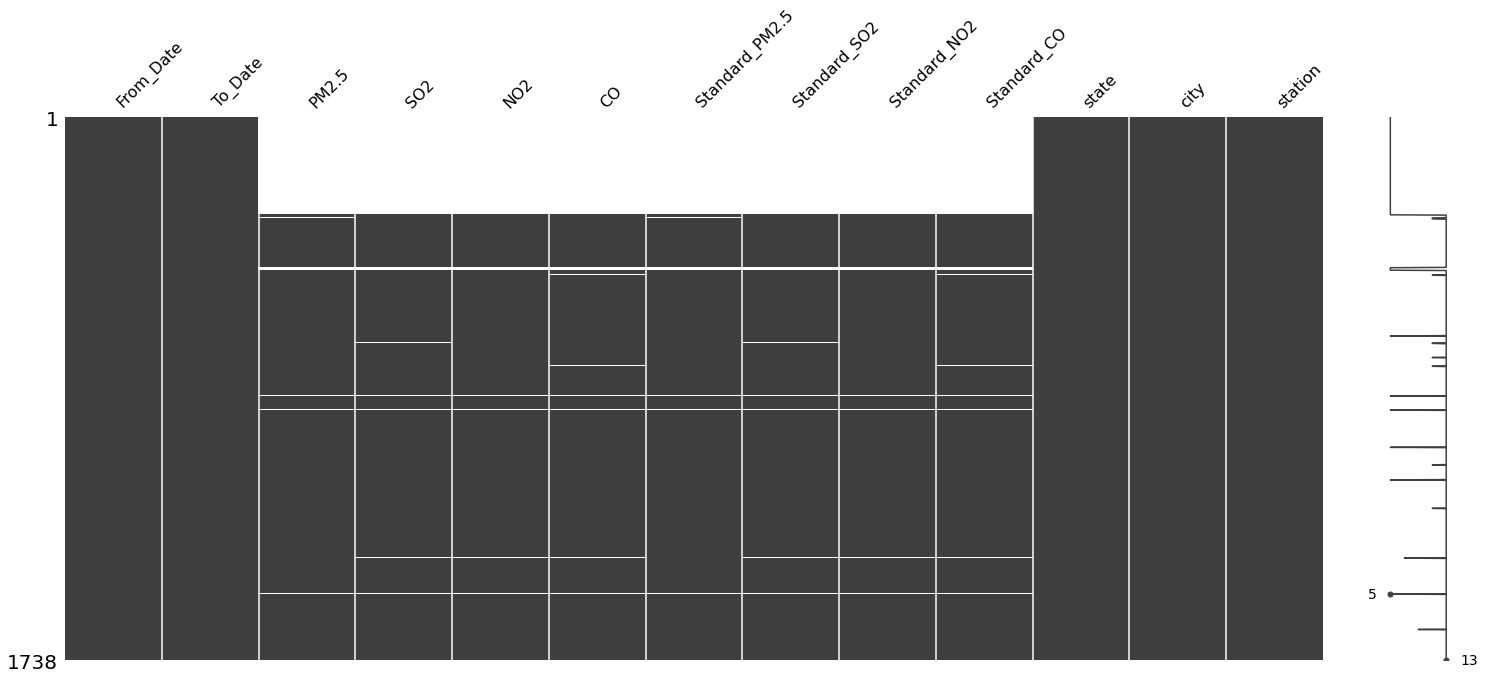

In [7]:
import missingno as msno

msno.matrix(df)

In [8]:
df.columns

Index(['From_Date', 'To_Date', 'PM2.5', 'SO2', 'NO2', 'CO', 'Standard_PM2.5',
       'Standard_SO2', 'Standard_NO2', 'Standard_CO', 'state', 'city',
       'station'],
      dtype='object')

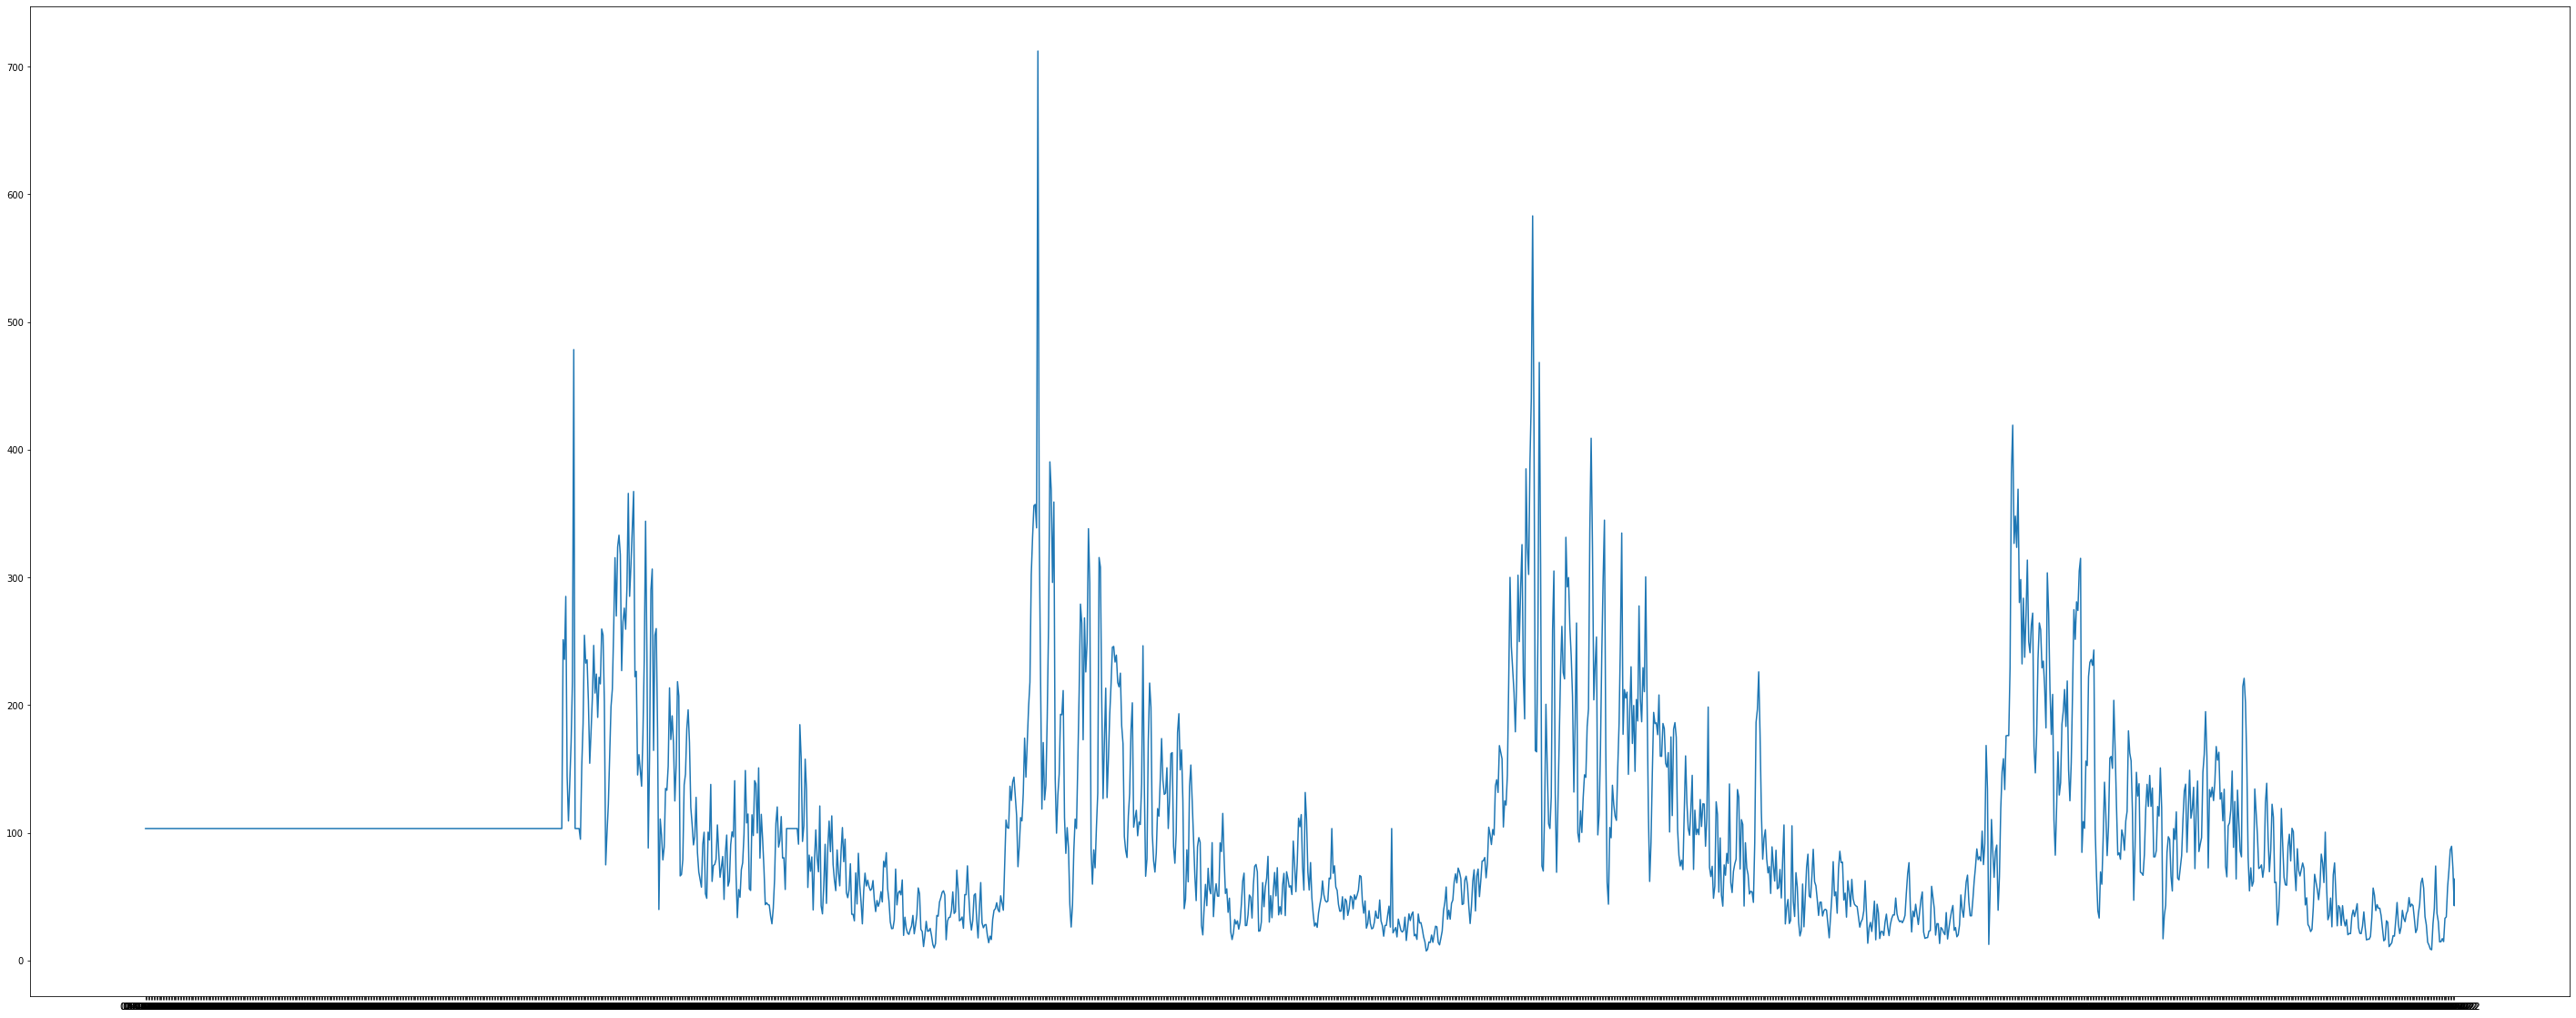

In [16]:
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
#fill by mean
df_mean = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['PM2.5'] = mean_imputer.fit_transform(df_mean['PM2.5'].values.reshape(-1,1))
fig = plt.figure(figsize = (50, 20))
plt.plot(df_mean.To_Date.str[:10], df_mean['PM2.5'])
plt.show()

<AxesSubplot:title={'center':'PM2.5'}>

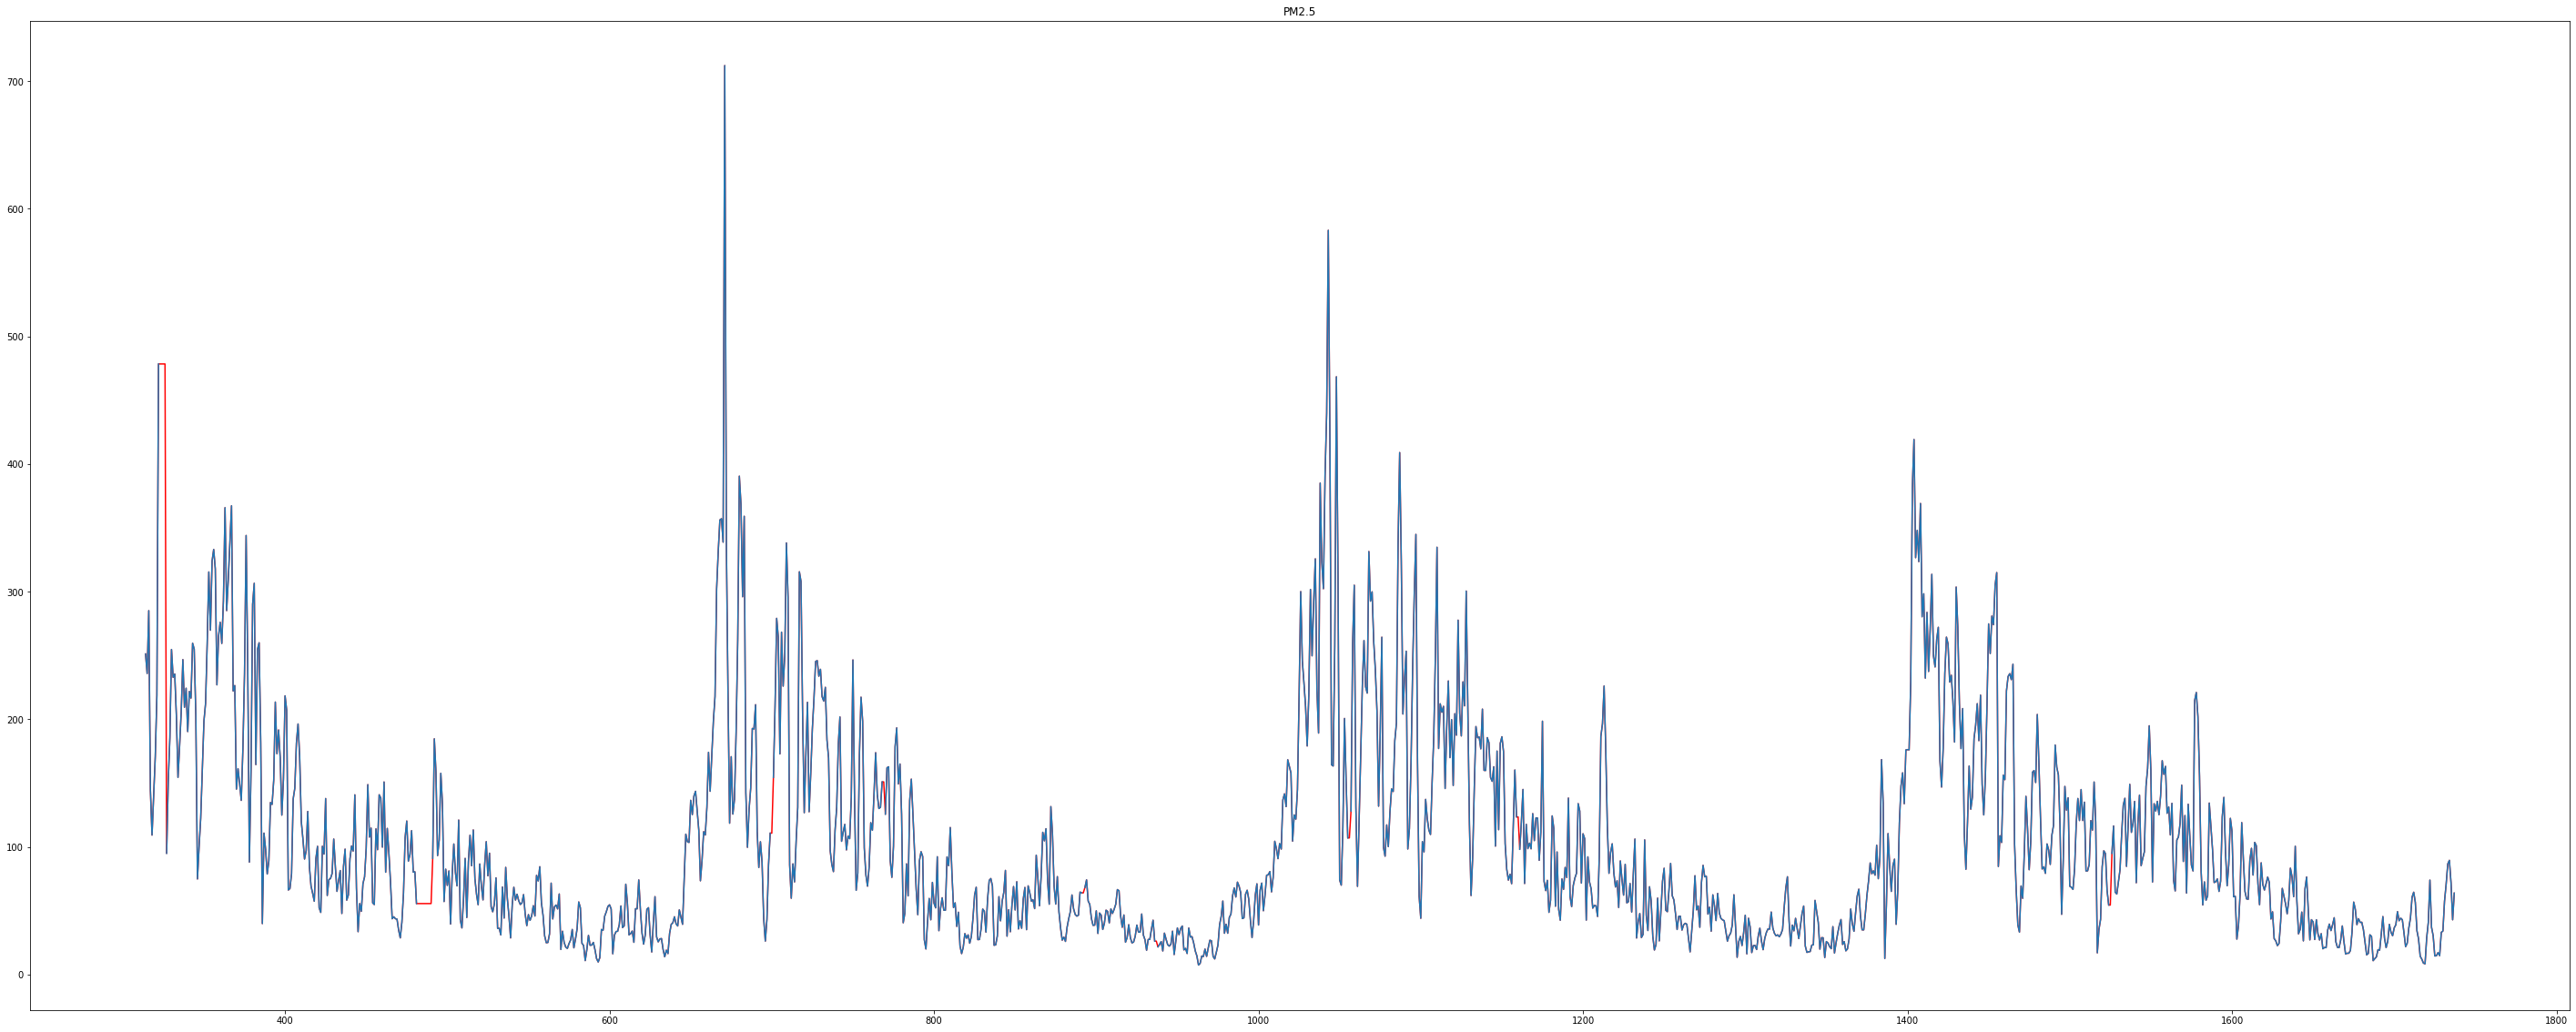

In [19]:
#fill by forward fill / back fill 
ffill_imputation = df.fillna(method='ffill')
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
ffill_imputation['PM2.5'].plot(color='red')

df['PM2.5'].plot(title='PM2.5')

<AxesSubplot:title={'center':'PM2.5'}>

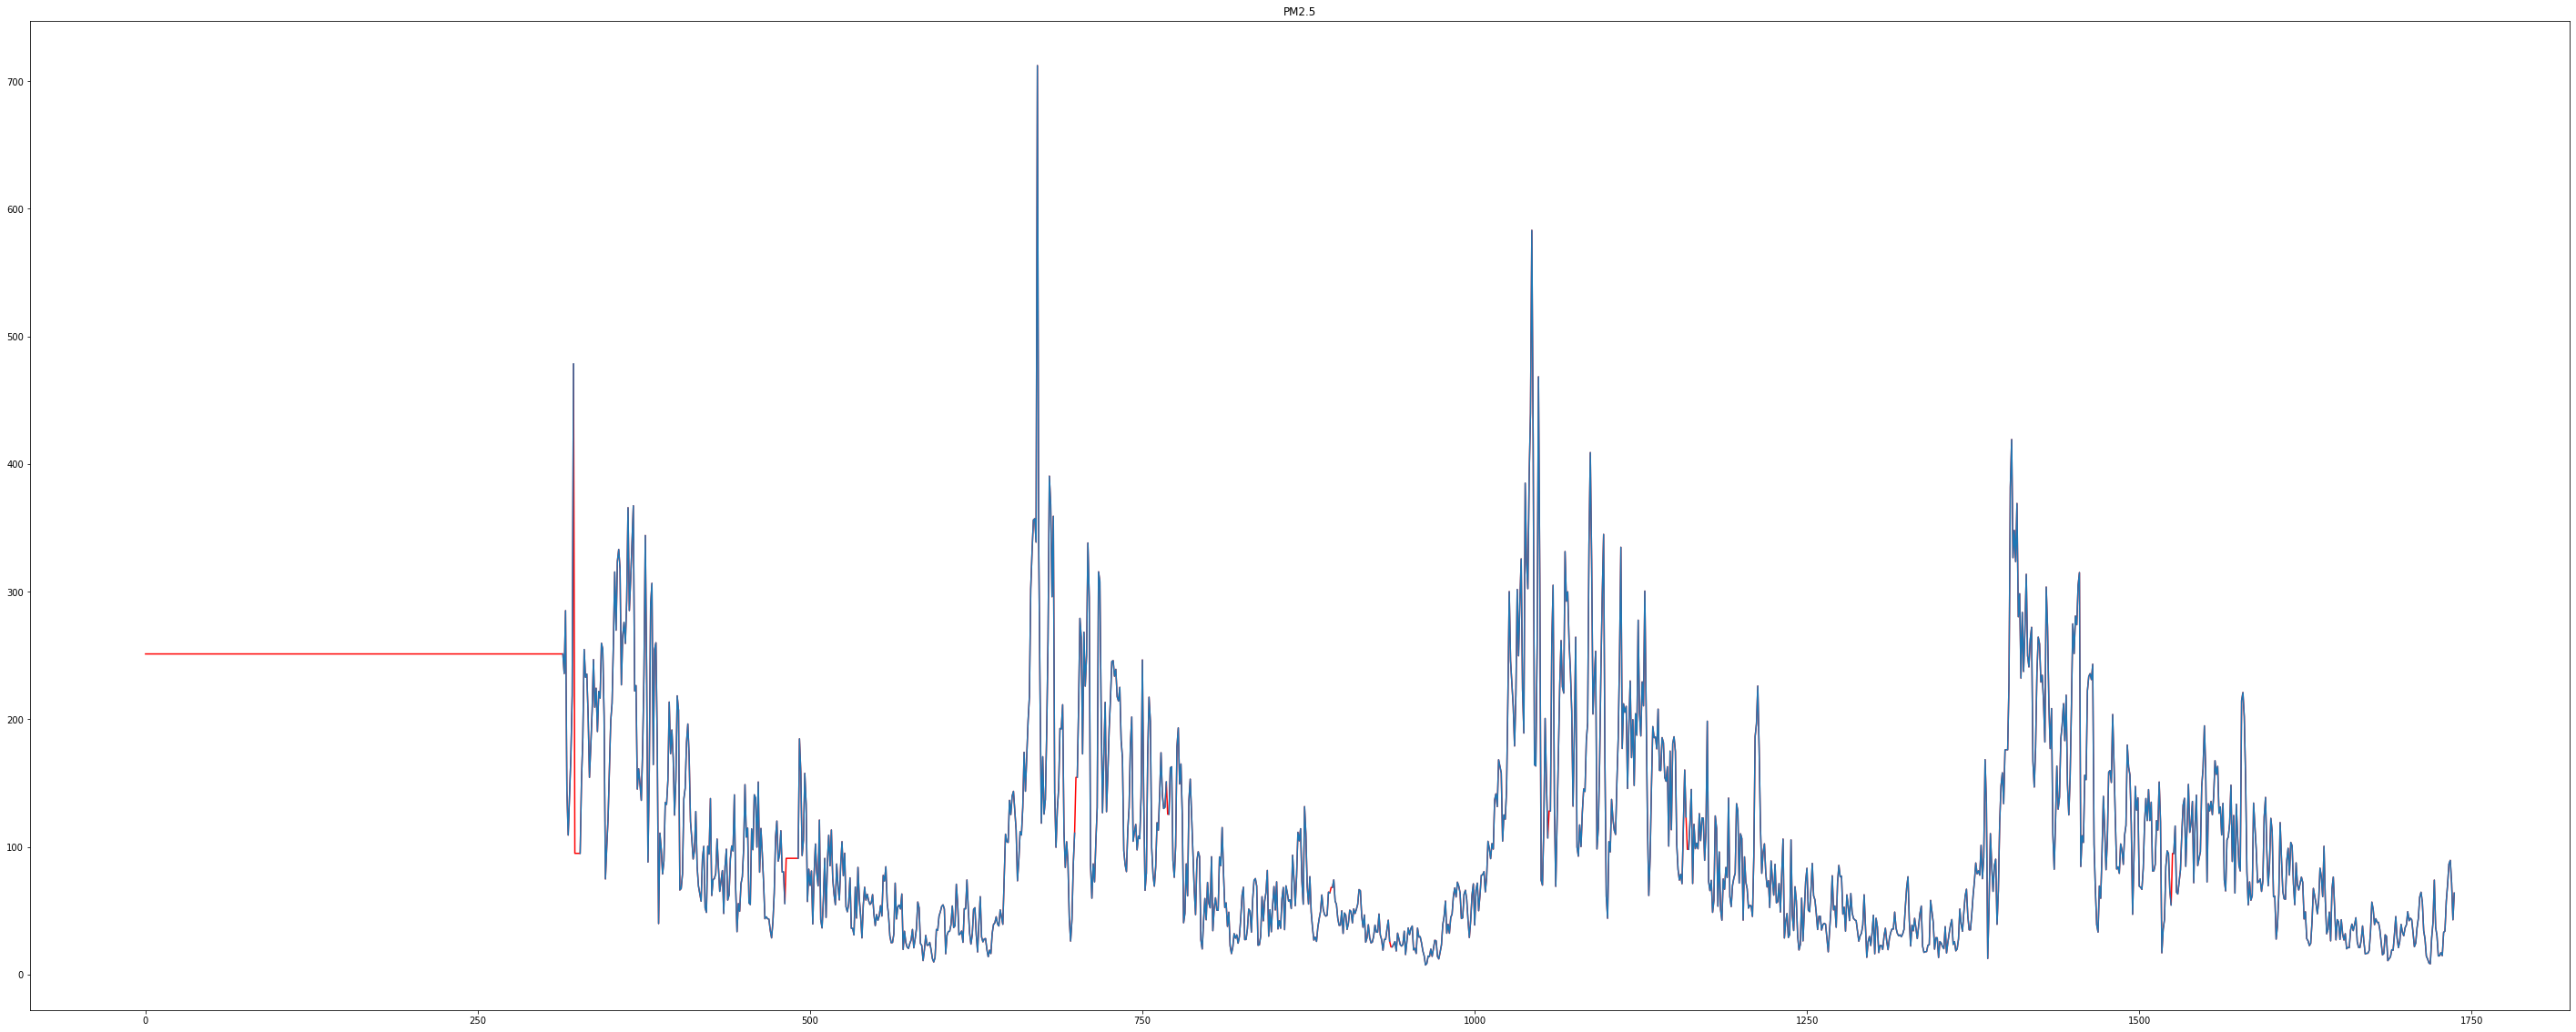

In [25]:
#fill by forward fill / back fill 
bfill_imputation = df.fillna(method='bfill')
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
bfill_imputation['PM2.5'].plot(color='red')

df['PM2.5'].plot(title='PM2.5')

<AxesSubplot:title={'center':'PM2.5'}>

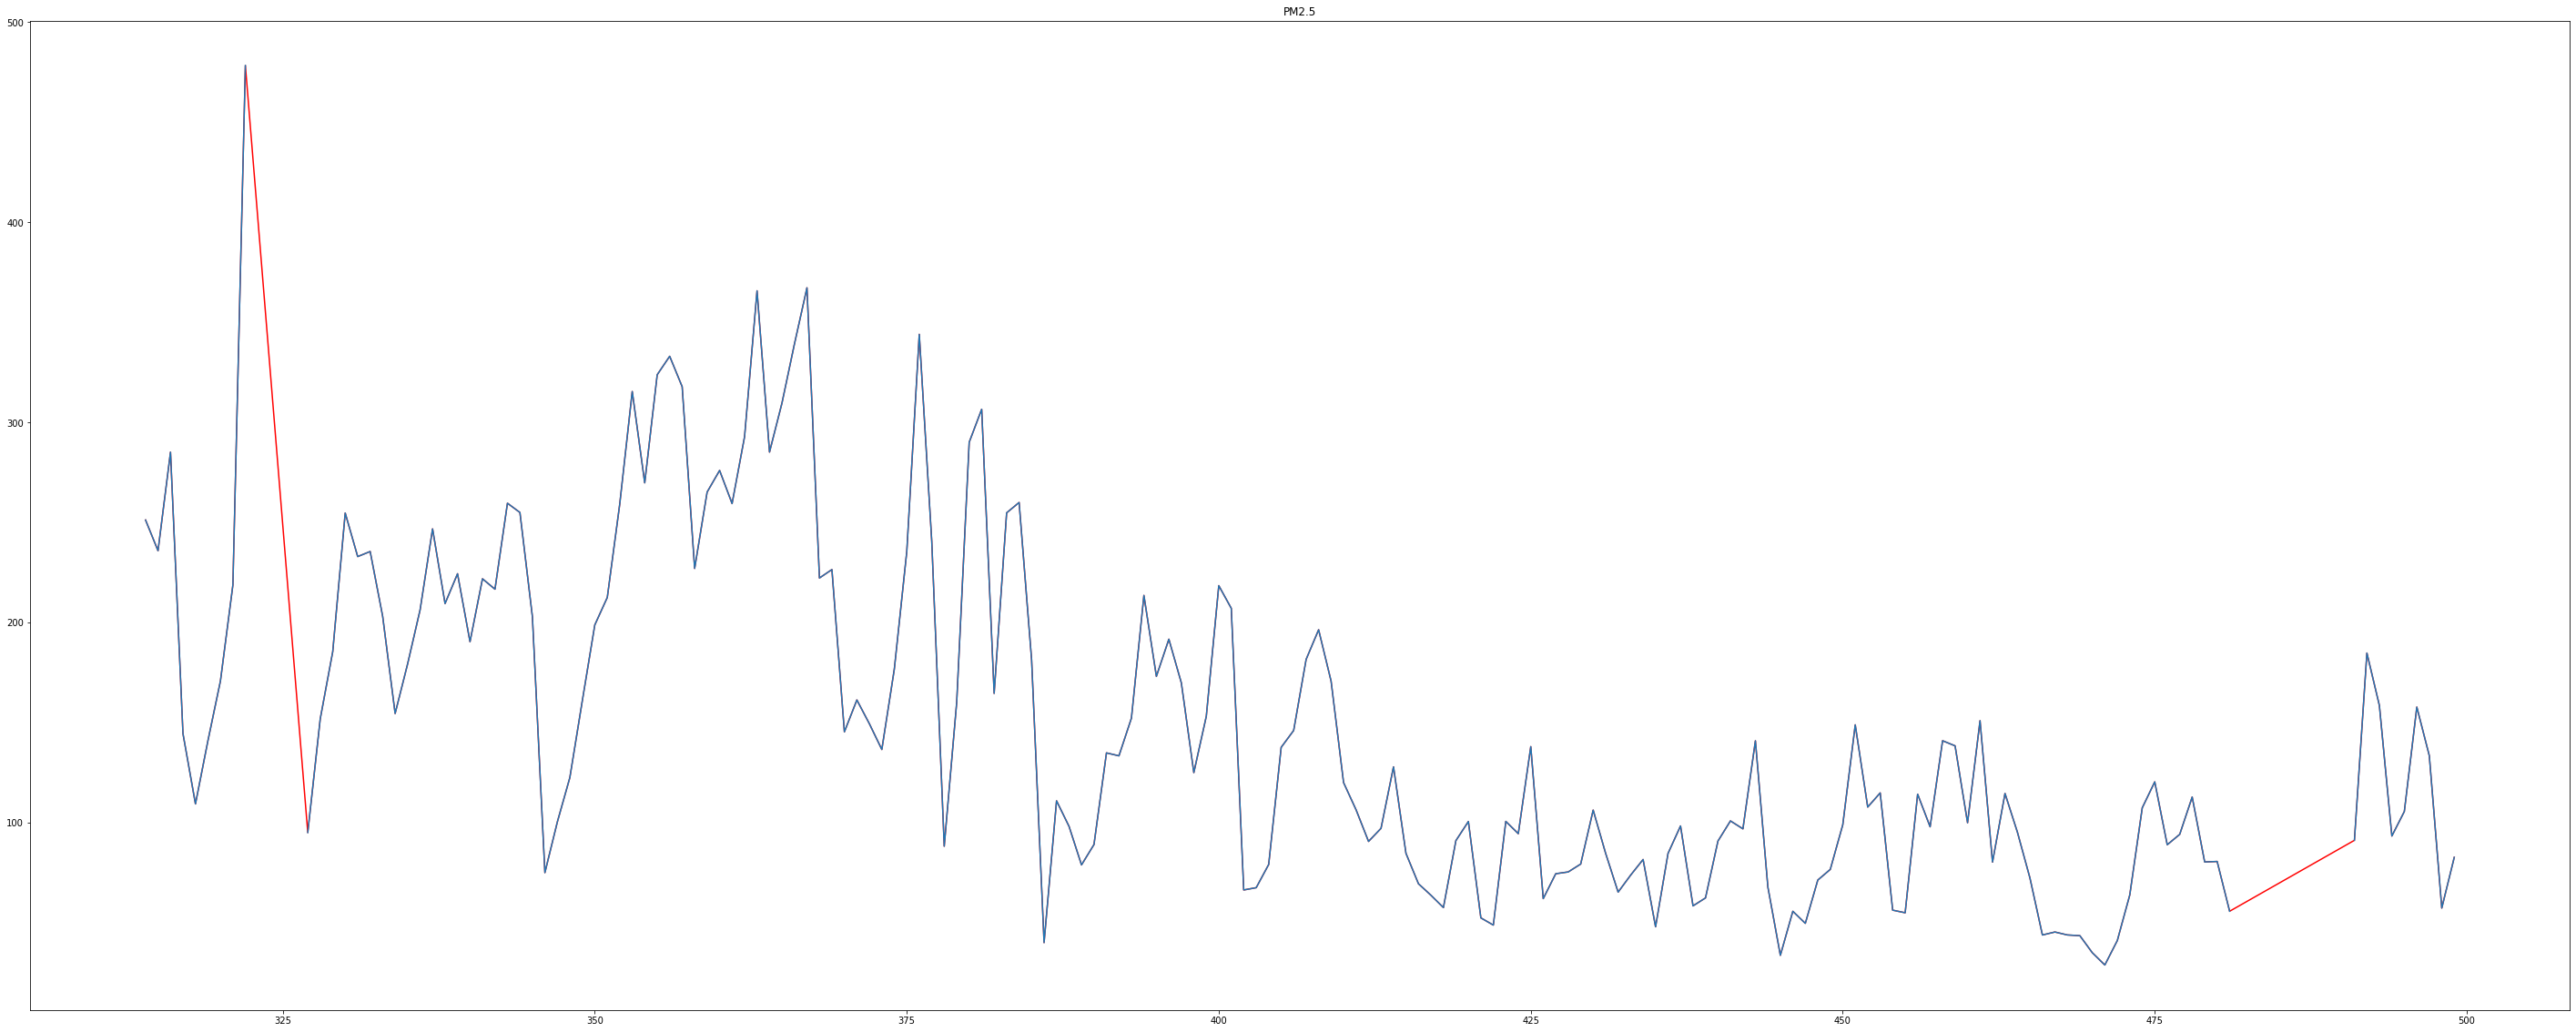

In [29]:
linear_interpolation  = df.interpolate(option='time')
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
linear_interpolation ['PM2.5'][:500].plot(color='red')

df['PM2.5'][:500].plot(title='PM2.5')

<AxesSubplot:title={'center':'PM2.5'}>

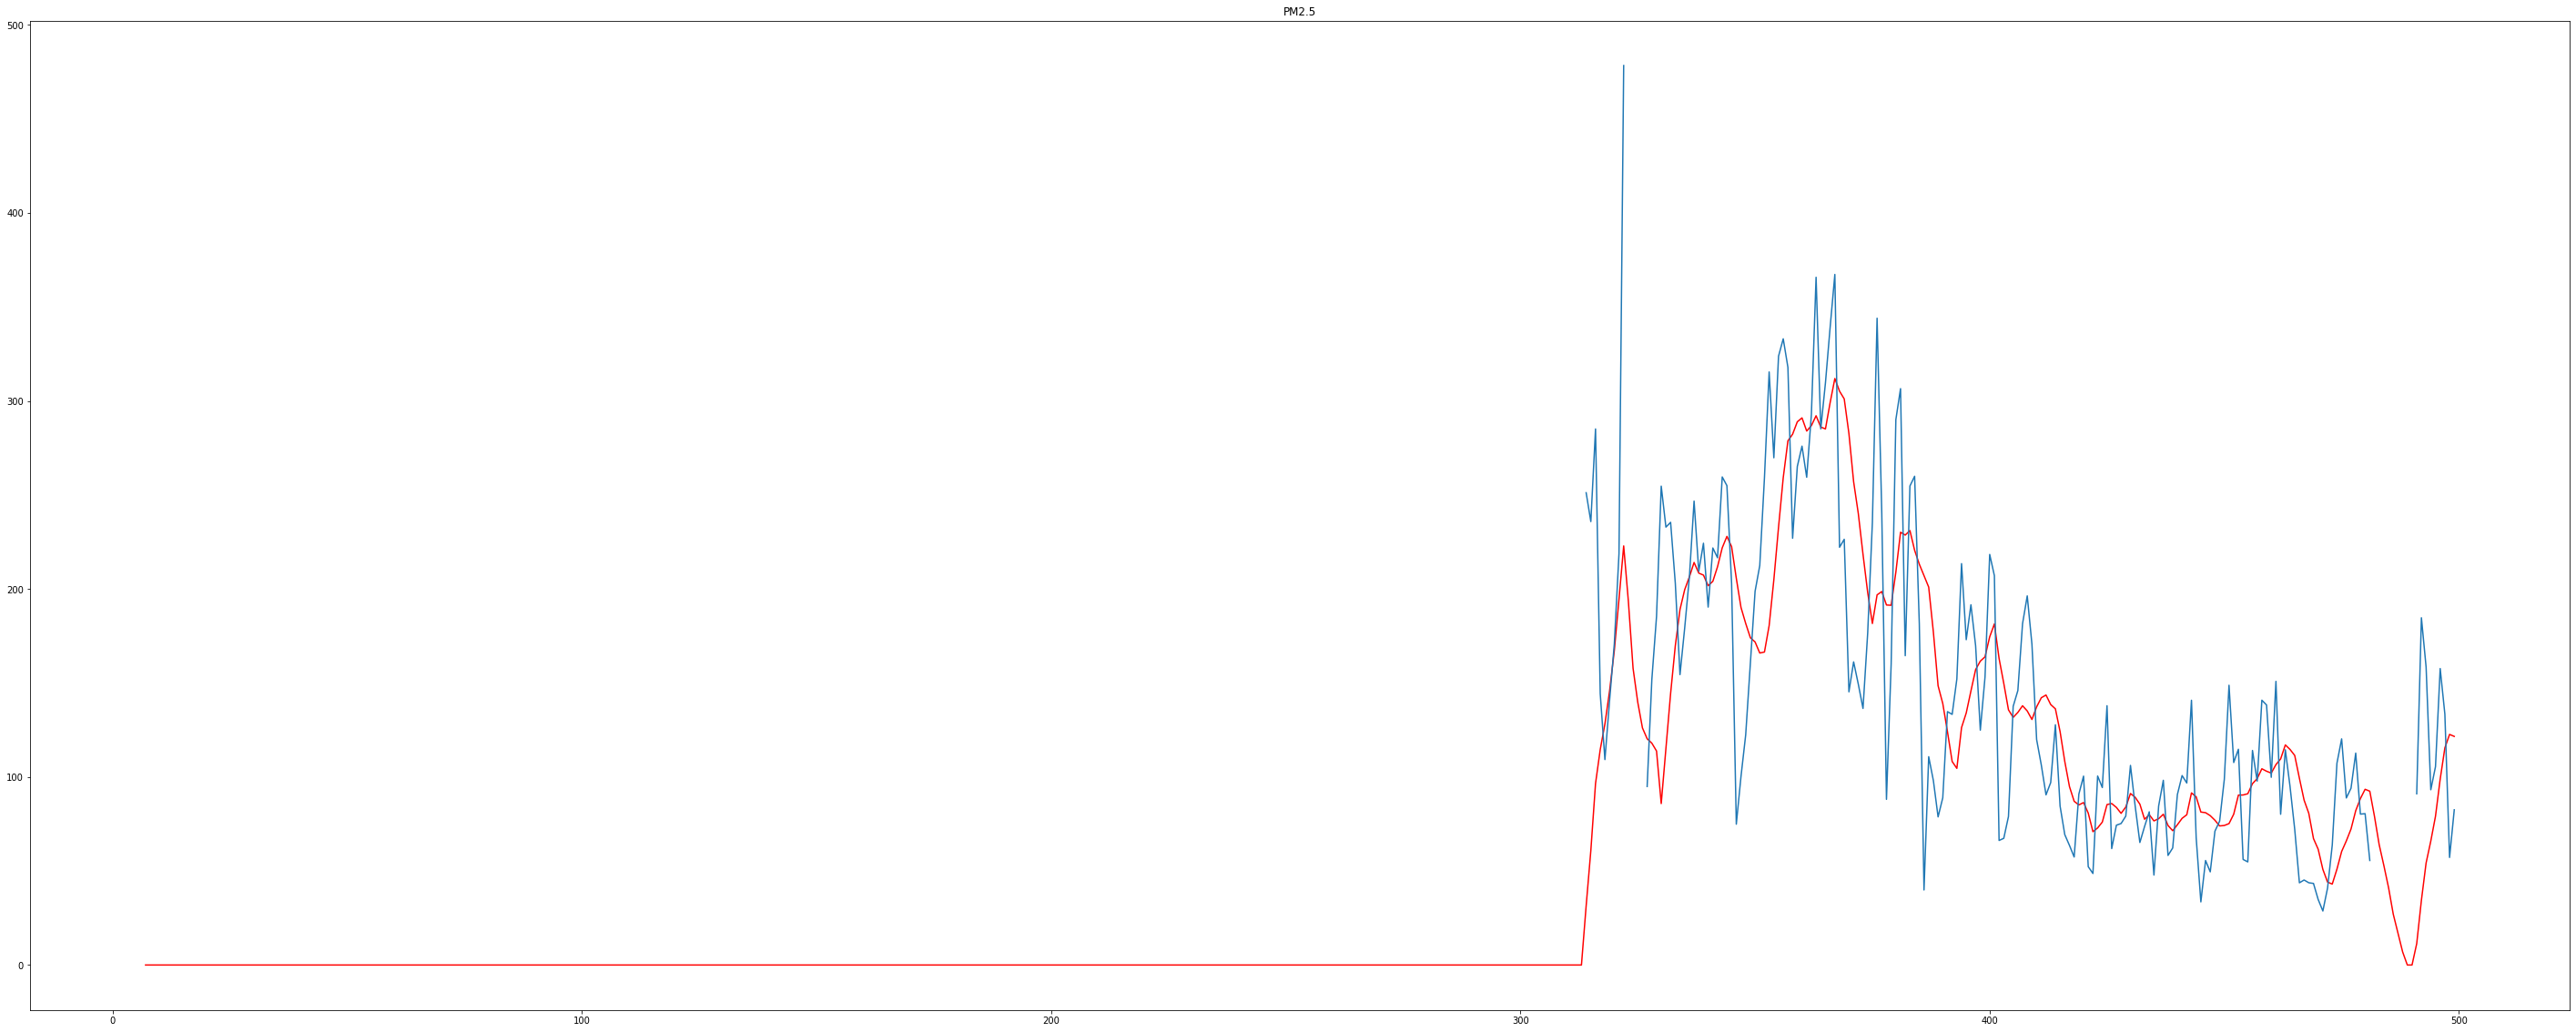

In [51]:
test = df.fillna(0)
linear_interpolation  = test.rolling(window = 8).mean()
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
linear_interpolation['PM2.5'][:500].plot(color='red')

df['PM2.5'][:500].plot(title='PM2.5')

<AxesSubplot:title={'center':'PM2.5'}>

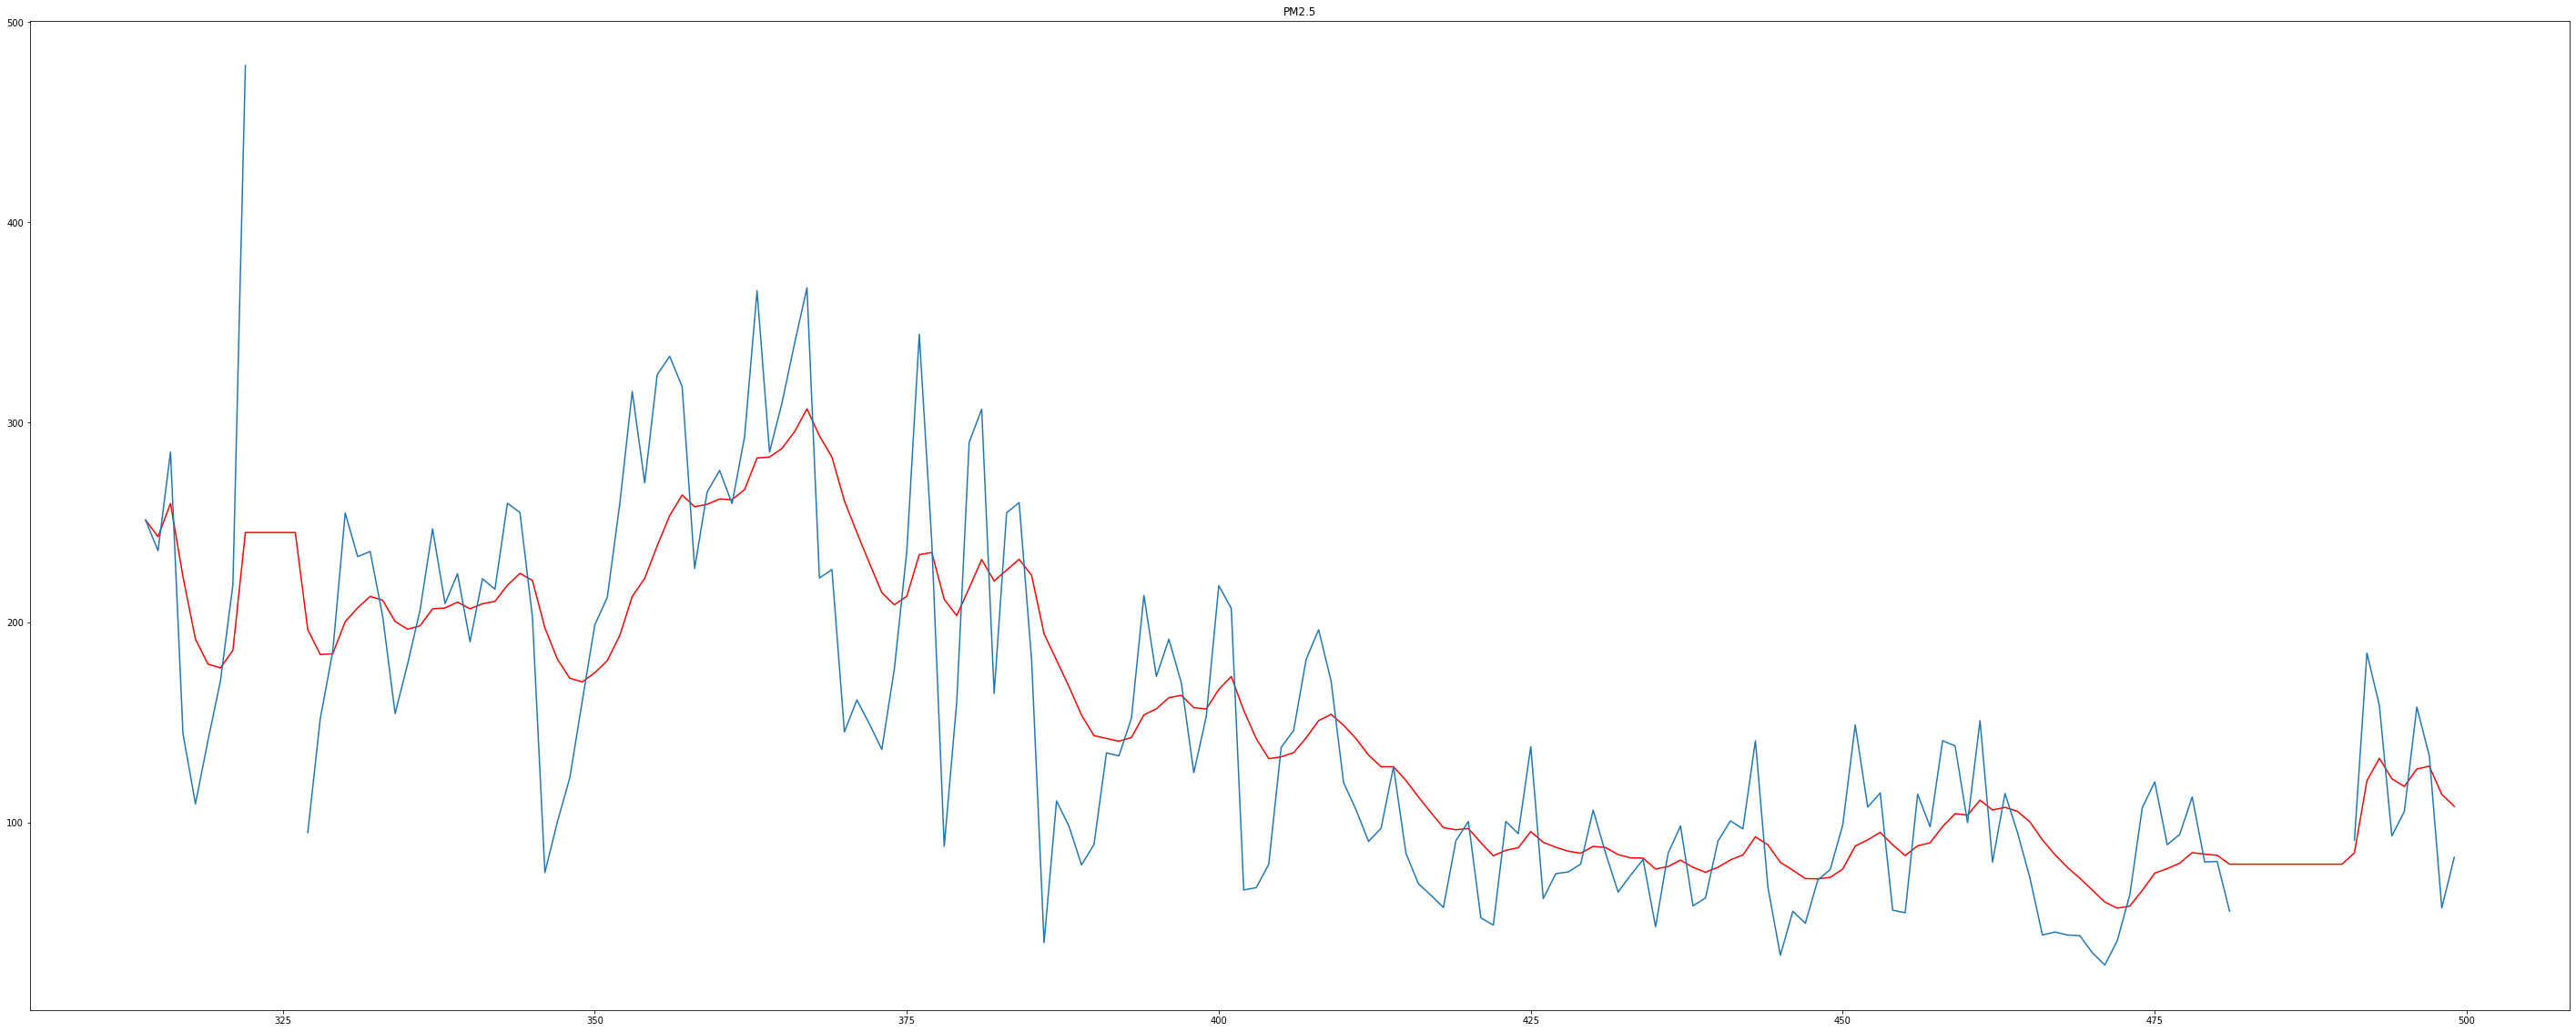

In [49]:
#test = df.fillna()

linear_interpolation  = df.ewm(halflife=4).mean()
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
linear_interpolation['PM2.5'][:500].plot(color='red')

df['PM2.5'][:500].plot(title='PM2.5')

In [52]:
from sklearn.impute import KNNImputer
import numpy as np

KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')

KNNImputer()

In [53]:
df.columns

Index(['From_Date', 'To_Date', 'PM2.5', 'SO2', 'NO2', 'CO', 'Standard_PM2.5',
       'Standard_SO2', 'Standard_NO2', 'Standard_CO', 'state', 'city',
       'station'],
      dtype='object')

In [69]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = df.filter(['PM2.5','SO2','NO2','CO'], axis=1).copy()

# Define scaler to set values between 0 and 1
df_knn = pd.DataFrame(df_knn, columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

<AxesSubplot:title={'center':'PM2.5'}>

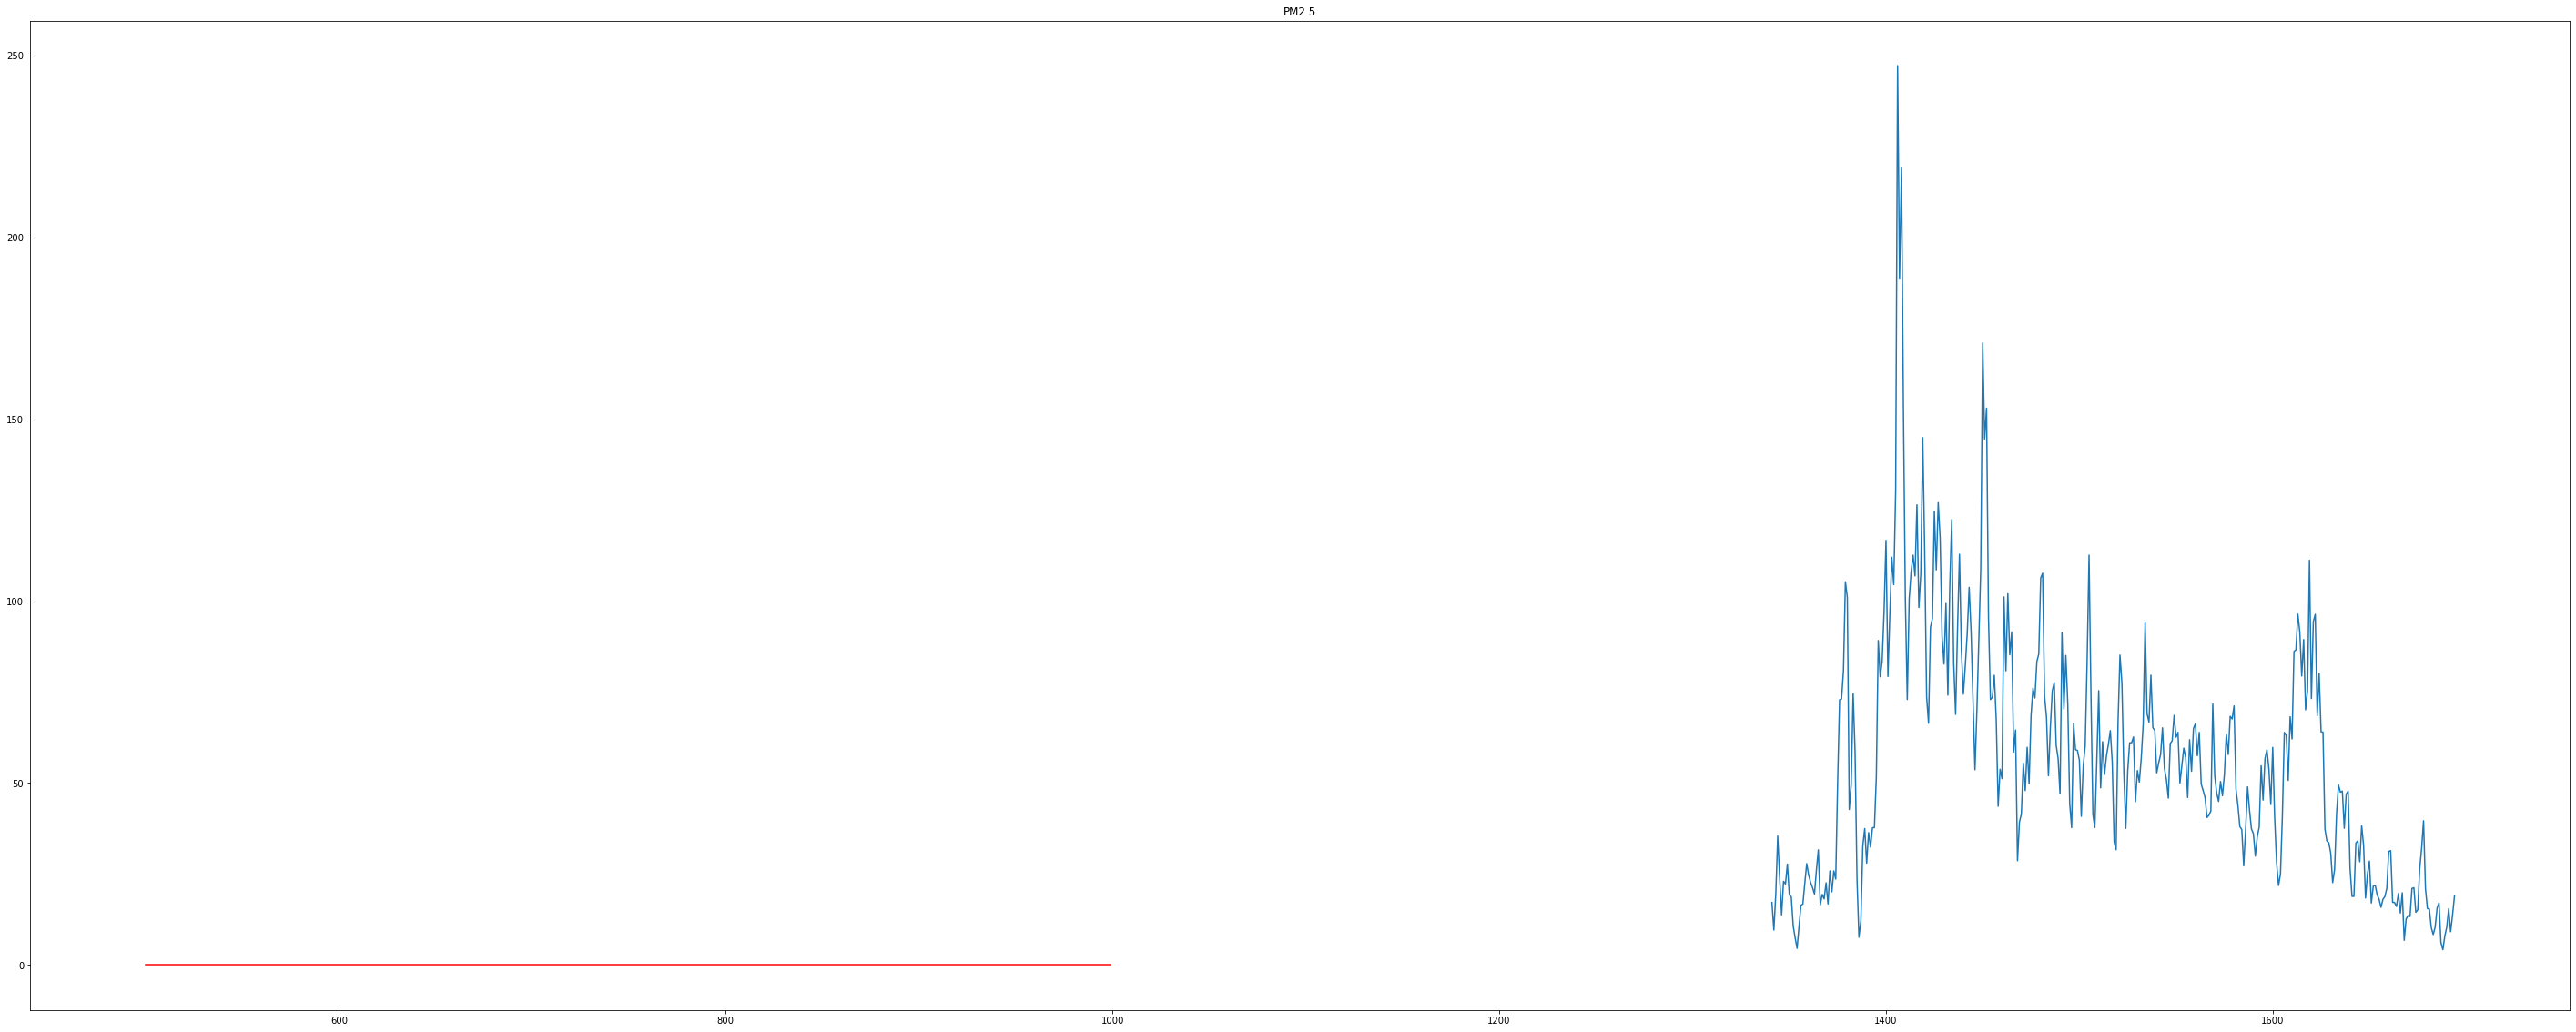

In [54]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
df_knn_imputed['PM2.5'][500:1000].plot(color='red')

df['PM2.5'].plot(title='PM2.5')

<AxesSubplot:title={'center':'PM2.5'}>

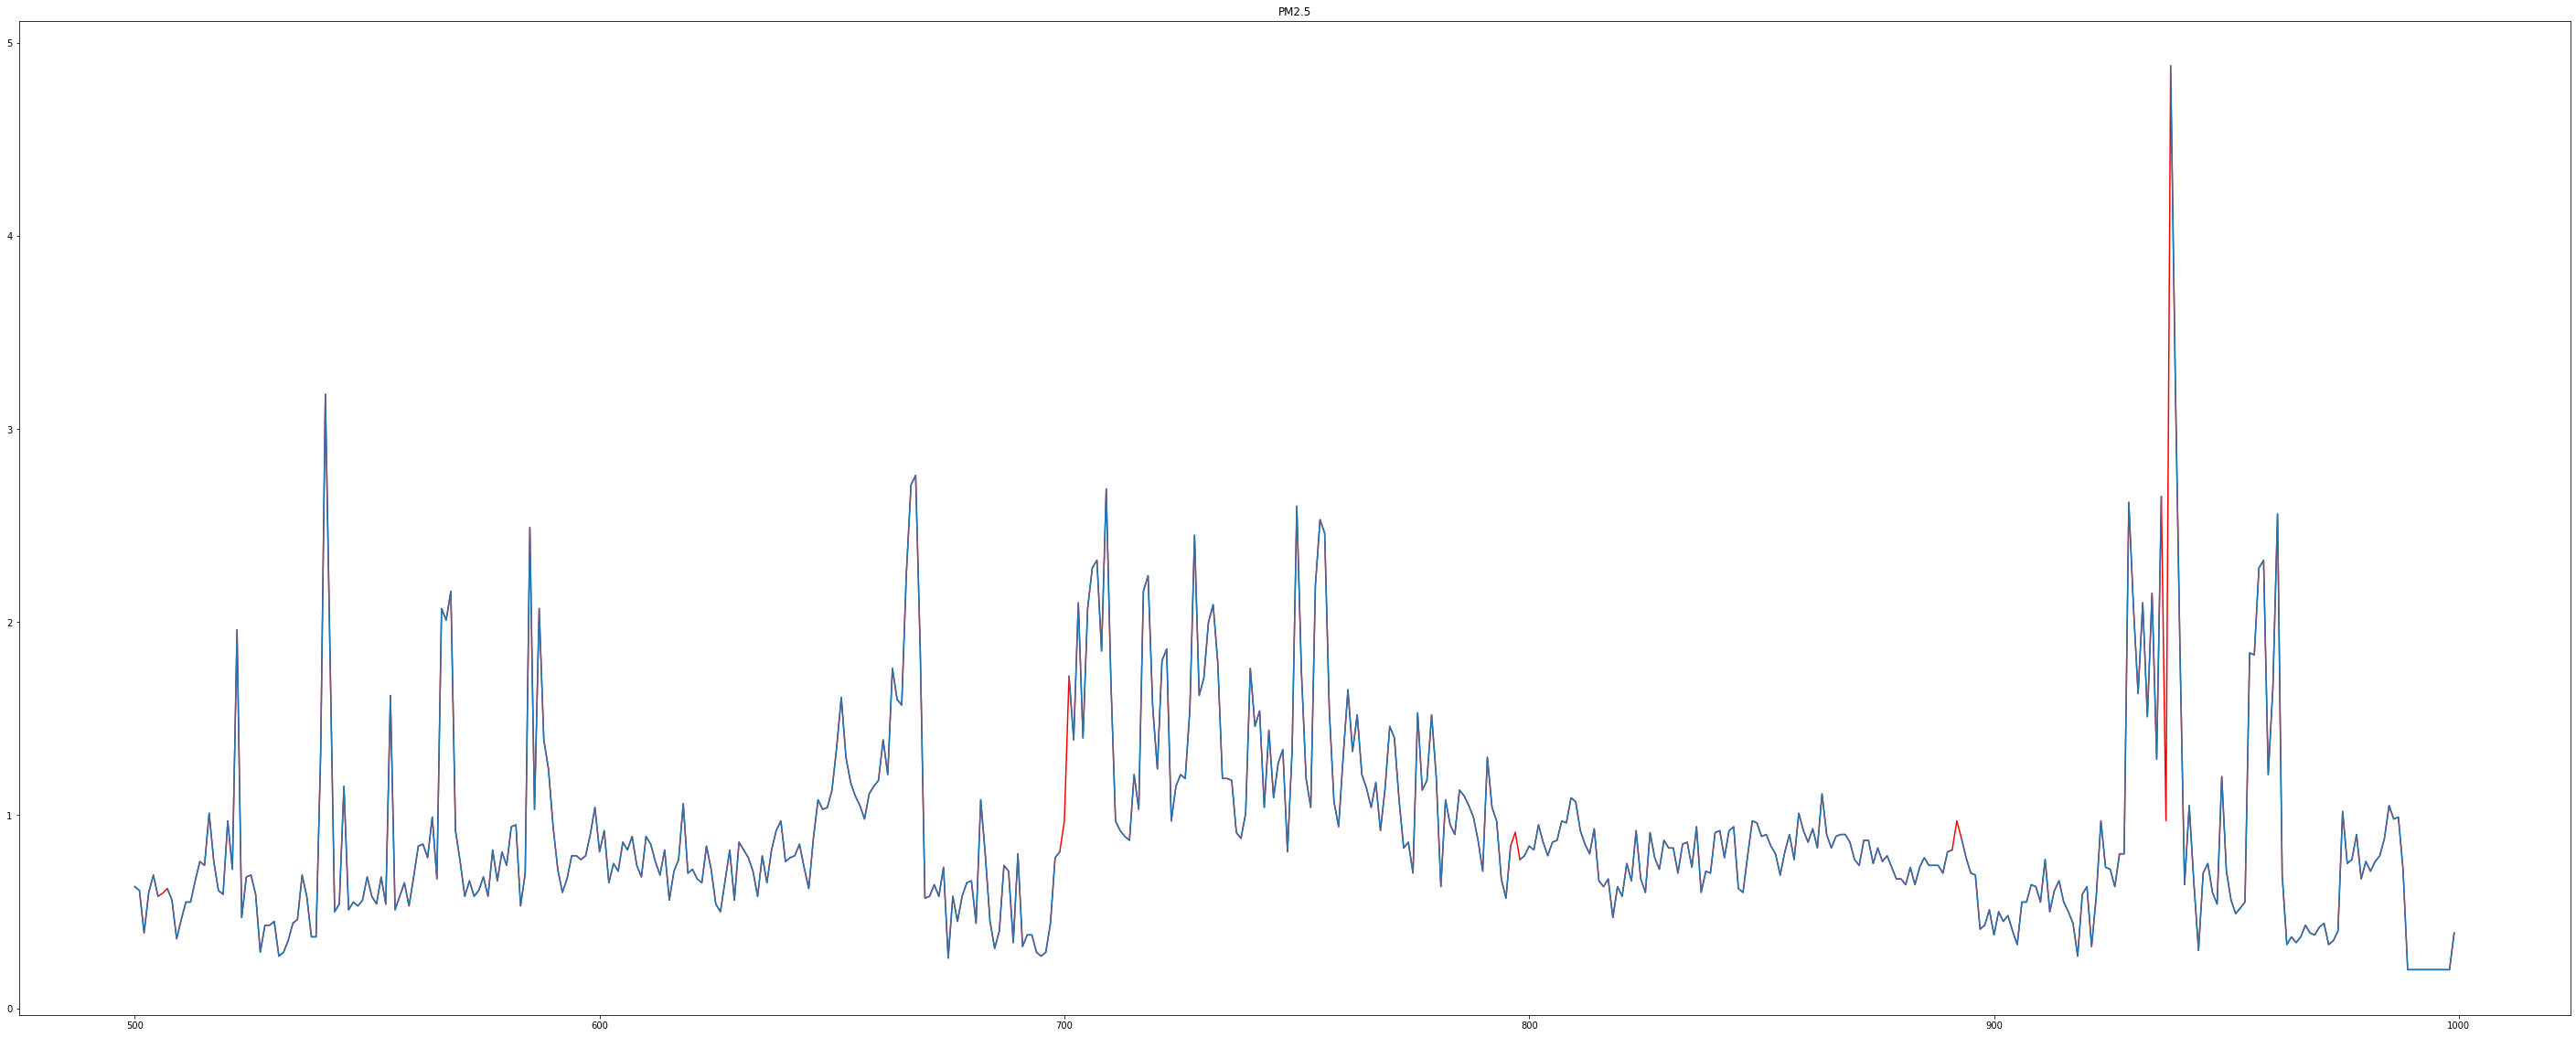

In [73]:
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
df_knn_imputed['CO'][500:1000].plot(color='red')

df['CO'][500:1000].plot(title='PM2.5')

In [74]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['PM2.5','SO2','NO2','CO'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

<AxesSubplot:title={'center':'PM2.5'}>

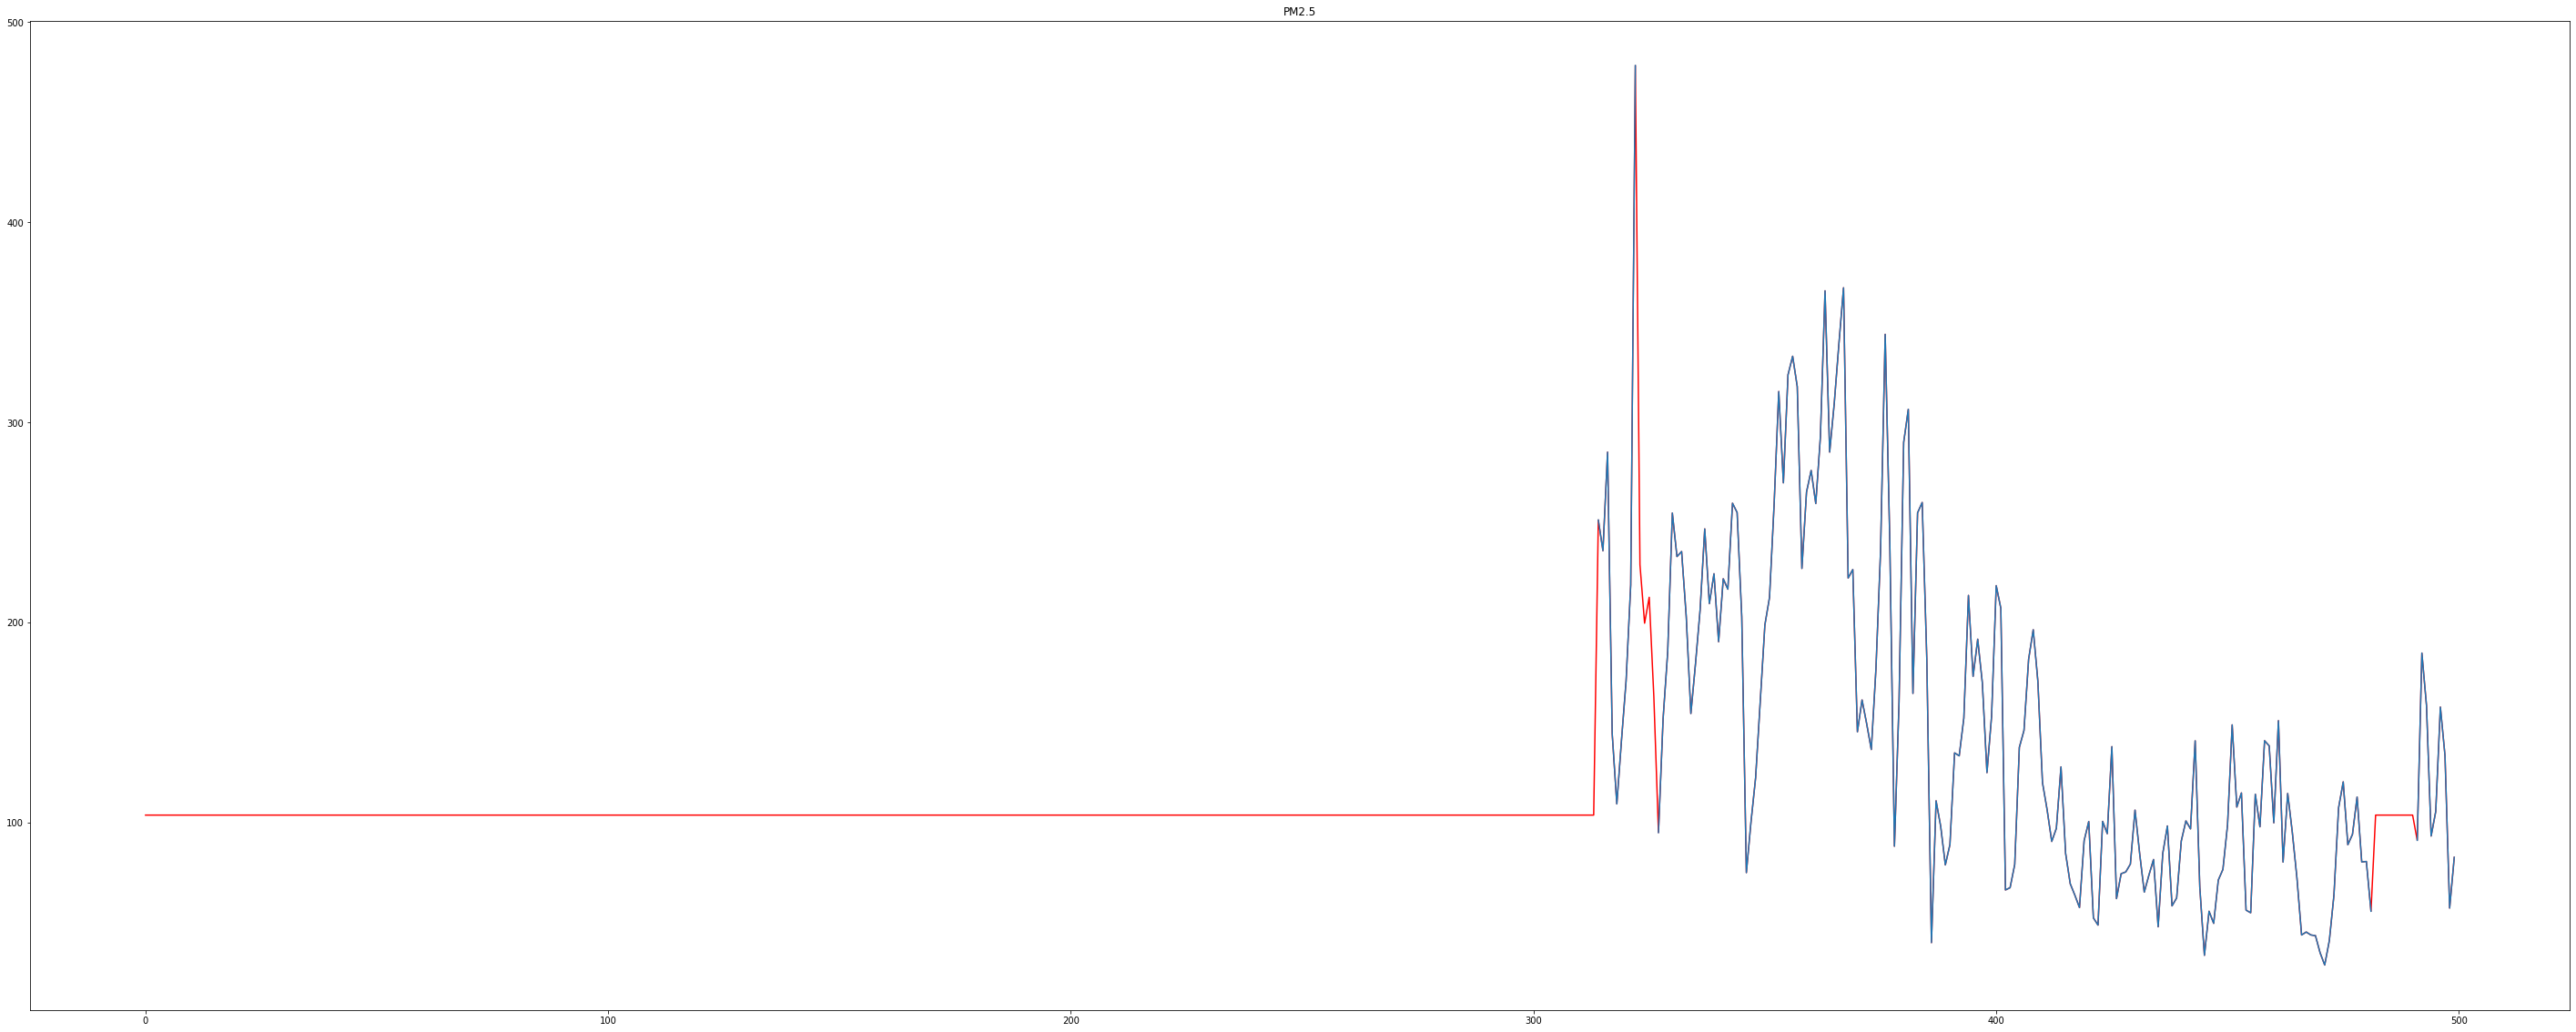

In [77]:
fig = plt.figure(figsize = (50, 20))
# Plot imputed data
df_mice_imputed['PM2.5'][:500].plot(color='red')

df['PM2.5'][:500].plot(title='PM2.5')